In [1]:
print ("hello")

hello


In [2]:
%pip install pandas mysql-connector-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),  # Added payments.csv for specific handling
('order_items.csv','order_items')]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Prachi02@',
    database='sales'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = "C:/Users/sonip/Downloads/ecommerce"

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [4]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect( host = "localhost",
username ="root",
password ="Prachi02@",
database ="sales"

)
cur = db.cursor ()

Basic Queries
1. List all unique cities where customers are located.

In [7]:
query = """select distinct customer_city from customers"""
cur.execute (query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

2. Count the number of orders placed in 2017.


In [8]:
query = """select count(order_id) from orders where year(order_purchase_timestamp) = 2017""" 
cur.execute (query)
data = cur.fetchall()
data [0] [0]

180404

3. Find the total sales per category.

In [12]:
query = """ select products.product_category category , round(sum(payments.payment_value),2) sales from products 
join order_items on products.product_id = order_items.product_id
join payments on order_items.order_id = payments.order_id
group by category
""" 
cur.execute (query)
data = cur.fetchall()
data 
df = pd.DataFrame (data , columns = ["Category" ,"Sales"])
df

,Category,Sales
0,perfumery,3.243127e+07
1,Furniture Decoration,9.153129e+07
2,telephony,3.116045e+07
3,bed table bath,1.096034e+08
4,automotive,5.454684e+07
...,...,...
69,cds music dvds,7.676352e+04
70,La Cuisine,1.864659e+05
71,Fashion Children's Clothing,5.028288e+04
72,PC Gamer,1.391635e+05


4. Calculate the percentage of orders that were paid in installments.

In [20]:
query = """ select sum(case when payment_installments >= 1 then 1 else 0 end )/count(*) * 100 from payments
""" 
cur.execute (query)
data = cur.fetchall()
"the percentage of orders that were paid in installments is " , data [0] [0]


('the percentage of orders that were paid in installments is ',
 Decimal('99.9981'))

5.Count the number of customers from each state.

In [52]:


query = """select customer_state , count(customer_id) from customers
group by customer_state """
cur.execute (query)
data = cur.fetchall()
data 

dq = pd.DataFrame(data , columns = ["customer_state","no_of_customers"])
dq.sort_values(by = "no_of_customers" , ascending = False)
dq


,customer_state,no_of_customers
0,SP,166984
1,SC,14548
2,MG,46540
3,PR,20180
4,RJ,51408
5,RS,21864
6,PA,3900
7,GO,8080
8,ES,8132
9,BA,13520


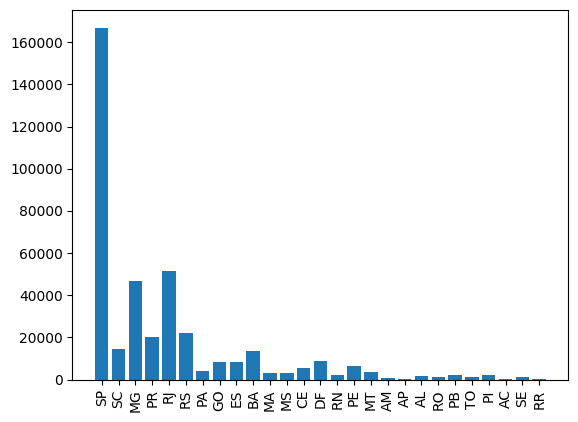

In [51]:
plt.bar(dq ["customer_state"], dq ["no_of_customers"])
plt.xticks(rotation = 90)
plt.show()


Intermediate Queries


1. Calculate the number of orders per month in 2018.

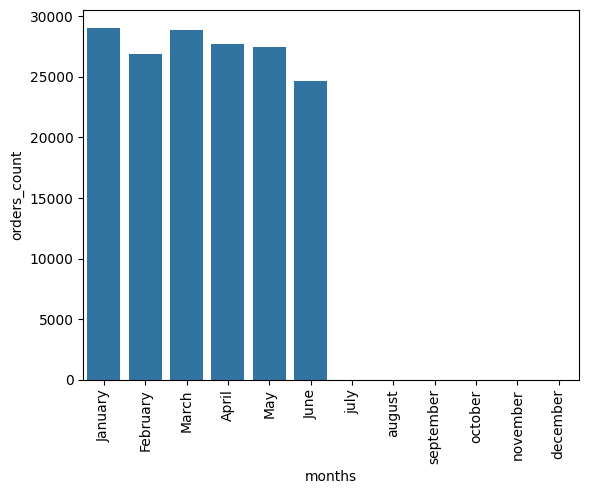

In [61]:
query = """select monthname(order_purchase_timestamp) months ,count(order_id) from orders where year(order_purchase_timestamp) = 2018
group by months """
cur.execute (query)
data = cur.fetchall()
data 
dw = pd.DataFrame(data , columns=["months","orders_count"])
o = ["January","February","March" ,"April","May","June","july","august","september","october","november","december"]

sns.barplot(x = dw["months"], y = dw["orders_count"], data = dw ,order = o)
plt.xticks(rotation = 90)
plt.show()

2. Find the average number of products per order, grouped by customer city.

In [67]:
query = """with count_per_orders as (select orders.order_id , orders.customer_id ,count(order_items.order_id) as oc from orders 
join order_items on 
orders.order_id = order_items.order_id
group by orders.order_id , orders.customer_id)

select customers.customer_city , round(avg(count_per_orders.oc ),2)from customers join 
count_per_orders on customers.customer_id = count_per_orders.customer_id group by customers.customer_city
"""
cur.execute (query)
data = cur.fetchall()
data 
dp = pd.DataFrame(data , columns = ["customer_city","avg no"])
dp

,customer_city,avg no
0,sao paulo,18.50
1,sao jose dos campos,18.22
2,porto alegre,18.80
3,indaial,17.85
4,treze tilias,20.36
...,...,...
4105,sambaiba,16.00
4106,guairaca,32.00
4107,japaratuba,16.00
4108,tuiuti,16.00


3. Calculate the percentage of total revenue contributed by each product category.

In [73]:
query = """ select products.product_category category , round(sum(payments.payment_value),2) / ( select sum(payment_value) from payments ) * 100 percentage from products 
join order_items on products.product_id = order_items.product_id
join payments on order_items.order_id = payments.order_id
group by category
""" 
cur.execute (query)
data = cur.fetchall()
data 
df = pd.DataFrame (data , columns = ["Category" ,"percentage"])
df

,Category,percentage
0,perfumery,50.645783
1,Furniture Decoration,142.938379
2,telephony,48.661222
3,bed table bath,171.160457
4,automotive,85.182199
...,...,...
69,cds music dvds,0.119877
70,La Cuisine,0.291192
71,Fashion Children's Clothing,0.078523
72,PC Gamer,0.217322
